<a href="https://colab.research.google.com/github/Beowoulfk/ML/blob/main/RegresionPOLY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Real estate valuation data set Data Set**

[Data Set](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) Information:

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. The real estate valuation is a regression problem. The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).

* 'X1 transaction date': 'X1'

* 'X2 house age': 'X2'

* 'X3 distance to the nearest MRT station': 'X3'

* 'X4 number of convenience stores': 'X4'

* 'X5 latitude': 'X5'

* 'X6 longitude': 'X6'

* 'Y house price of unit area': 'Y'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel("Real_estate_valuation_data_set.xlsx")
data.set_index(["No"], inplace=True)

In [ ]:
df = data.rename(columns={'X1 transaction date': 'X1',
                          'X2 house age': 'X2',
                          'X3 distance to the nearest MRT station': 'X3',
                          'X4 number of convenience stores': 'X4',
                          'X5 latitude': 'X5',
                          'X6 longitude': 'X6',
                          'Y house price of unit area': 'Y'})
df.head()

,X1,X2,X3,X4,X5,X6,Y
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
correlations = df[df.columns[:]].corr().abs()['Y'][:-1]
correlations = correlations.sort_values(ascending=False, kind="quicksort")
print(f"""
Correlaciones entre features y target:
{correlations}
""")


Correlaciones entre features y target:
X3    0.673613
X4    0.571005
X5    0.546307
X6    0.523287
X2    0.210567
X1    0.087529
Name: Y, dtype: float64



Observamos que hay gran correlación entre X3 (distancia a la estación de MRT más cercana) y Y (precio de la vivienda por unidad de superficie).

Veamos cómo es su relación gráficamente

In [ ]:
np.random.seed(2020)


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

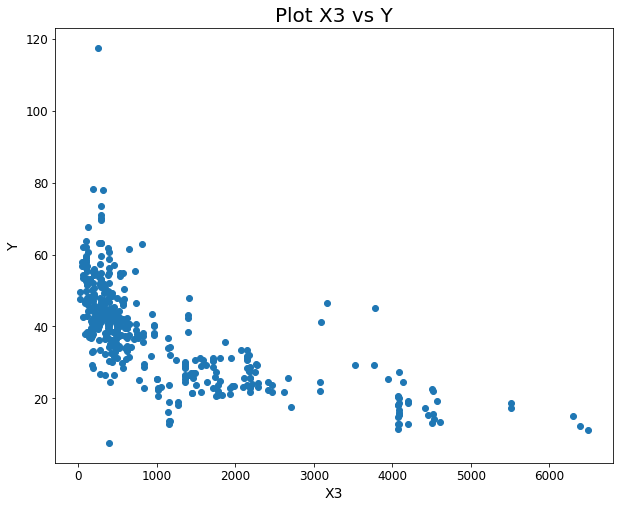

In [ ]:
X = df['X3']
Y = df['Y']
plt.figure(figsize=(10,8))
plt.scatter(X, Y)
plt.title('Plot X3 vs Y', fontsize=20)
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('X3', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.show()

## Regresión Lineal con Gradiente Descendiente

Nota: Según el scatter plot anterior, está claro que no se obtendrán buenos resultados usando regresión lineal.
Tal vez con polinomial se alcancen mejores sesultados.
En el caso de que no, usar NuSVR que al usar kernelización, definitivamente sirve.

https://www.datatechnotes.com/2020/07/regression-example-with-nusvr-in-python.html

https://www.datatechnotes.com/2020/09/regression-example-with-sgdregressor-in-python.html


In [ ]:
from sklearn.model_selection import train_test_split


X = np.expand_dims(df.iloc[:,2], axis=1)
# X = df.iloc[:,:-1]
y = df['Y']

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.1)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01)
sgd_reg.fit(xtrain, ytrain)


score = sgd_reg.score(xtrain, ytrain)
print("R-squared:", score)

print("Intercepto:", sgd_reg.intercept_)
print("Coeficiente:", sgd_reg.coef_)


R-squared: -5.7342011329091445e+28
Intercepto: [1.29472581e+11]
Coeficiente: [-1.96109751e+12]


**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
sgd_reg_GS = SGDRegressor()
sgd_reg_params = {
                'max_iter' : [1000],
                'tol' : [1e-3, 1e-7, 1e-9],
                'penalty' : [None],
                'eta0' : [0.01, 0.001, 0.0001, 0.00001, 0.0000001, 0.000000001]
                  }

sgd_reg = GridSearchCV(estimator=sgd_reg_GS, param_grid=sgd_reg_params)
sgd_reg.fit(xtrain, ytrain)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'eta0': [0.01, 0.001, 0.0001, 1e-05, 1e-07, 1e-09],
                         'max_iter': [1000], 'penalty': [None],
                         'tol': [0.001, 1e-07, 1e-09]})

In [ ]:
sgd_reg.best_params_

{'eta0': 1e-09, 'max_iter': 1000, 'penalty': None, 'tol': 1e-09}

In [ ]:
sgd_reg_aftergrid = SGDRegressor(max_iter=1000,
                                penalty=None,
                                tol=1e-7,
                                eta0=1e-09)
sgd_reg_aftergrid.fit(xtrain, ytrain)


score = sgd_reg_aftergrid.score(xtrain, ytrain)
print("R-squared:", score)

print("Intercepto:", sgd_reg_aftergrid.intercept_)
print("Coeficiente:", sgd_reg_aftergrid.coef_)

R-squared: -5.873920362179707
Intercepto: [7.38222676e-05]
Coeficiente: [0.01030577]


In [ ]:
from sklearn.metrics import mean_squared_error

ypred = sgd_reg_aftergrid.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  1054.909913592023
RMSE:  32.47937674266585


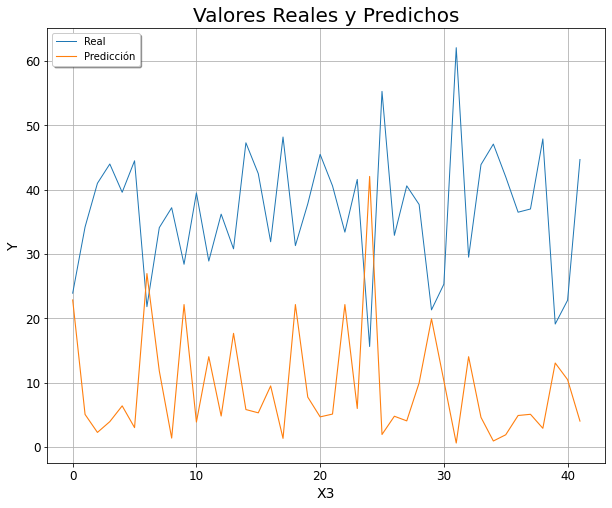

In [ ]:
plt.figure(figsize=(10, 8))
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="Real")
plt.plot(x_ax, ypred, linewidth=1.1, label="Predicción")
plt.title("Valores Reales y Predichos", fontsize=20)
plt.xlabel('X3', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.legend(loc='upper left',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


Los resultados tienen sentido pues, el error es bastante alto como se esperaba debido a la naturaleza de los datos

In [ ]:
y_m = 0.0109*(xtest)+7.3981e-05

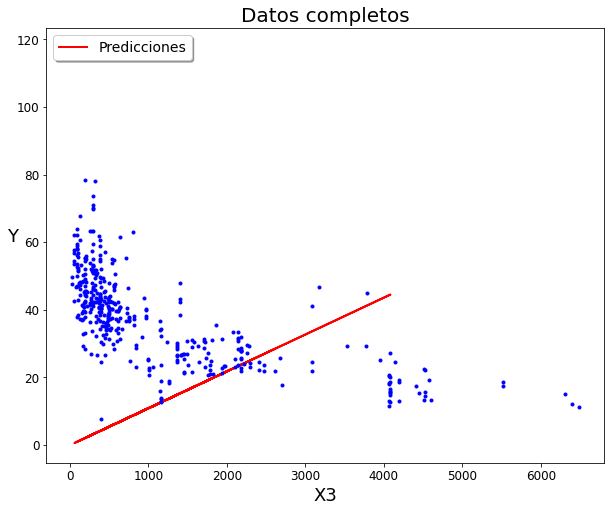

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(xtest, y_m,  "r-", linewidth=2, label="Predicciones")
plt.plot(X, y, "b.")
plt.title("Datos completos", fontsize=20)
plt.xlabel("X3", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14, fancybox=True, shadow=True)
plt.show()
# Linear Regression model predictions

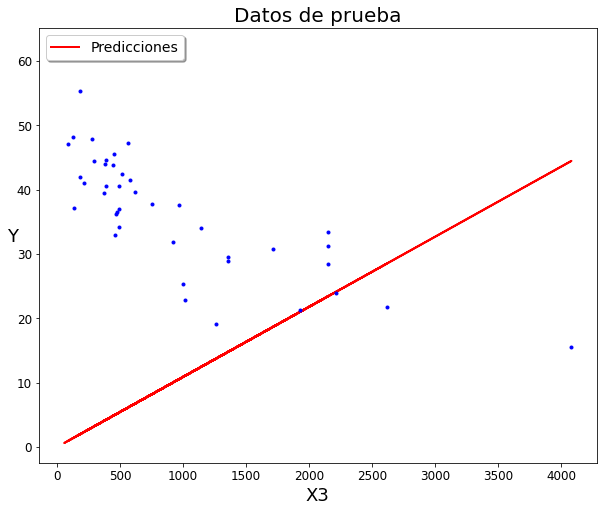

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(xtest, y_m,  "r-", linewidth=2, label="Predicciones")
plt.plot(xtest, ytest, "b.")
plt.title("Datos de prueba", fontsize=20)
plt.xlabel("X3", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14, fancybox=True, shadow=True)
# plt.axis([0, 2, 0, 15])
plt.show()
# Linear Regression model predictions

Como era de esperarse, la regresión lineal no se adapta los datos. Miremos si la regresión polinomial nos brinda mejores resultados

## Regresión Polinomial con Gradiente Descendiente

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(52.73448509471602, array([-2.50863801e-02,  6.76502118e-06, -6.13231314e-10]))

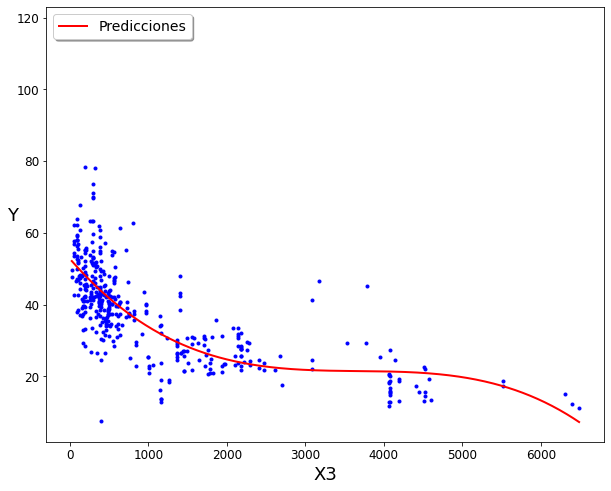

In [ ]:
X_new=np.linspace(min(X), max(X), 414).reshape(414, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(10, 8))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicciones")
plt.xlabel("X3", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14, fancybox=True, shadow=True)
plt.show()
# "quadratic_predictions_plot"
#Polynomial Regression model predictions

**Grid Search**

El grid search no dio buenos resultados, de hecho fue imposible y no encontramos respuesta en internet.
Por lo anterior, decidimos usar la solución propuesta en:
[stackoverflow](https://stackoverflow.com/questions/47414819/gridsearchcv-for-polynomial-regression)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
degrees = [2, 3, 4, 5, 6, 10] # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here
best_score = 0
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(xtrain)
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(X_train_poly, ytrain)
        scores = cross_val_score(polynomial_regressor, X_train_poly, ytrain, cv=5) # Change k-fold cv value here
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degree
            best_normalize = normalize

In [ ]:
print(f"""
Resultados
Best Score: {best_score}
Best Normalize: {best_normalize}
Best Degree: {best_degree}
""")



Resultados
Best Score: 0.709656383611587
Best Normalize: True
Best Degree: 6



A partir de la búsqueda de los mejores parámetos, encontramos que degree=6 es el mejor, pero por experiencia se sabe que un alto grado de polinomio va a ocasionar probablemente un Overfit ya que el modelo se adapta o memoriza el ruido de los datos y los resultados para datos nuevos será el incorrecto.

De todas formas, para continuar con el objetivo de la tarea se procederá con degree=6

In [ ]:
poly_features_aftergrid = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly_aftergrid = poly_features_aftergrid.fit_transform(X)

lin_reg_aftergrid = LinearRegression(normalize=True)
lin_reg_aftergrid.fit(X_poly_aftergrid, y)


LinearRegression(normalize=True)

In [ ]:
print("Intercepto:", lin_reg_aftergrid.intercept_)
print("Coeficiente:", lin_reg_aftergrid.coef_)

Intercepto: 52.5069416015044
Coeficiente: [-1.51693037e-02 -2.51968998e-05  2.75233028e-08 -9.84187275e-12
  1.48748824e-15 -8.12719013e-20]


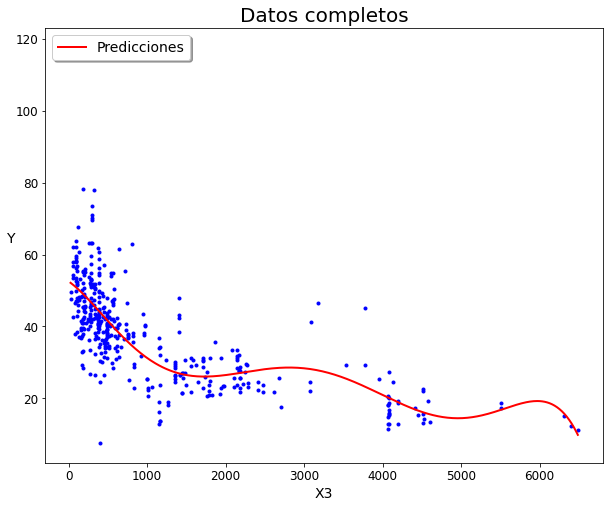

In [ ]:
X_new=np.linspace(min(X), max(X), 414).reshape(414, 1)
X_new_poly = poly_features_aftergrid.transform(X_new)
y_new = lin_reg_aftergrid.predict(X_new_poly)

plt.figure(figsize=(10, 8))
plt.plot(X, y, "b.")
plt.title("Datos completos", fontsize=20)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicciones")
plt.xlabel("X3", fontsize=14)
plt.ylabel("Y", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14, fancybox=True, shadow=True)
plt.show()
# "quadratic_predictions_plot"
#Polynomial Regression model predictions

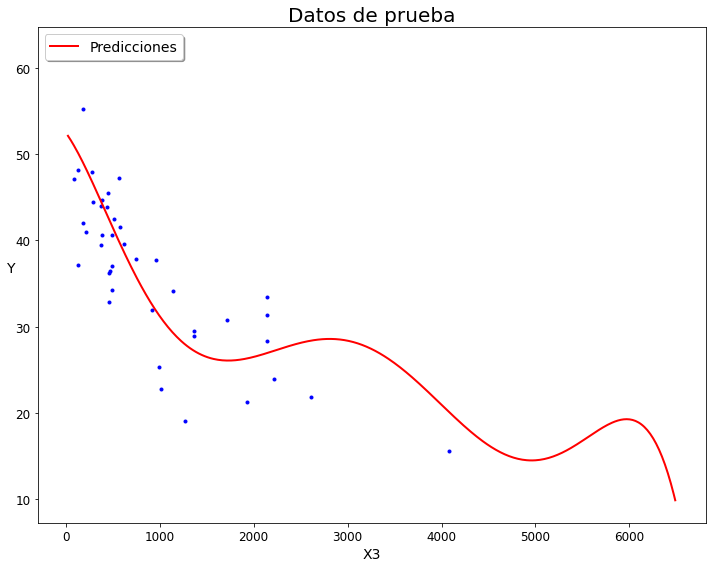

In [ ]:
X_new=np.linspace(min(X), max(X), 414).reshape(414, 1)
X_new_poly = poly_features_aftergrid.transform(X_new)
y_new = lin_reg_aftergrid.predict(X_new_poly)


plt.figure(figsize=(10, 8))
plt.plot(xtest, ytest, "b.")
plt.title("Datos de prueba", fontsize=20)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicciones")
plt.xlabel("X3", fontsize=14)
plt.ylabel("Y", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()
# "quadratic_predictions_plot"
#Polynomial Regression model predictions

## Curvas de aprendizaje

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="best", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

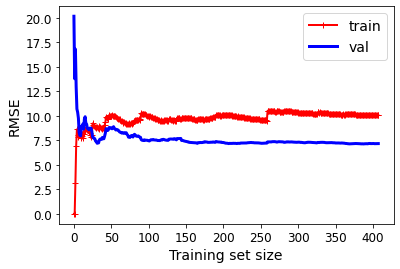

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()
# "underfitting_learning_curves_plot"
# Learning curves

Underfitting. Las dos gráficas alcanzaron un punto en el que no varían.

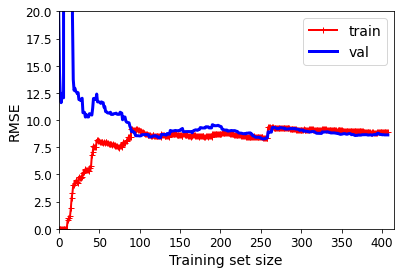

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=True)),
        ("lin_reg", LinearRegression(normalize=True)),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, len(X), 0, 20])
plt.show()
# Learning curves for the polynomial model

Overfitting, porque con un test_size de 10% dan separadas. Mientras que con un test_size de 1%, las curvas dan iguales aunque en un error considerablemente alto.